In [ ]:
!pip install wandb

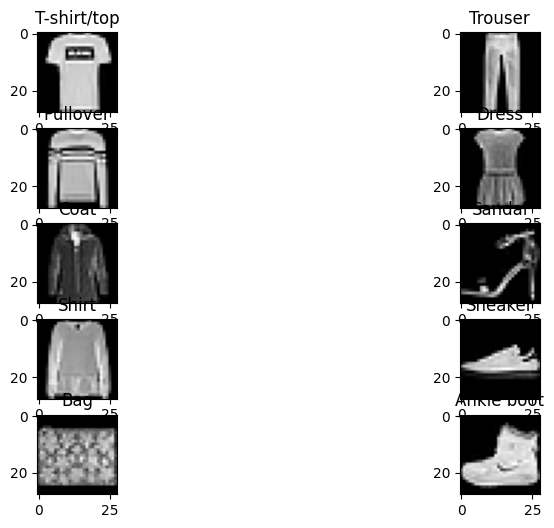

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import wandb
wandb.init(project="Assignment1", entity="lokendrakumar")  # project="Assignment name", entity="your-username"

NoOfClasses = 10
FashionTags = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

# get a matplotlib figure and plot the images
fig, axes = plt.subplots(5, 2, figsize=(10, 6))

Images = []
ImageTags = []

for i in range(NoOfClasses):
    Pos = np.argwhere(y_train == i)[0]
    image = x_train[Pos, :, :]
    axes[i // 2, i % 2].imshow(image.squeeze(), cmap='gray')  # Use squeeze() to remove the singleton dimension
    axes[i // 2, i % 2].set_title(FashionTags[i])
    Images.append(np.expand_dims(image, axis=-1))
    ImageTags.append(FashionTags[i])

plt.show()

# Log the images with their corresponding tags
wandb.log({"Question 1": [wandb.Image(img.squeeze(), caption=caption) for img, caption in zip(Images, ImageTags)]})
